

# Diseño de una propuesta de optimización del sistema de alertas tempranas por deforestación para Colombia, caso de estudio “Corazón de la Amazonia”

# Análisis del tamaño de deforestación del departamento del Meta

### Cristhian Forero Castro

Este documento analiza el tamaño de las areas deforestadas registradas a nivel del departametno de Meta durante el los periodos 2014-2019 de los datos del Sistema de Monitoreo de Bosques y Carbono 


## Contenido 


> #### 1. Análisis de los tamaños de deforestación de la serie de tiempo 2014-2019 Meta
> #### 2. Análisis  de los Tamaños de los parches deforestados en el Departamento Meta
> ####  Comparaciones



## 1. Análisis de los tamaños de deforestación de la serie de tiempo 2014-2019 Meta

Los datos fueron generados a partir de los mapas oficiales de cambio de bosque disponibles en el Sistema de Monitoreo de Bosques y Carbono – SMBYC (http://smbyc.ideam.gov.co/). Se extrae la clase temática de deforestación y se genera un archivo .shp teniendo en cuenta un conexión de 8 vecinos. El archivo contiene las áreas (hectáreas) de cada polígono detectado como deforestación para cada periodo. Las columnas presentes en el archivo de la serie temporal son las siguientes:

+ Deforestación 2013 - 2014   =>   def_14
+ Deforestación 2014 - 2015   =>   def_15
+ Deforestación 2015 - 2016   =>   def_16
+ Deforestación 2016 - 2017   =>   def_17
+ Deforestación 2017 - 2018   =>   def_18
+ Deforestación 2018 - 2019   =>   def_19

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm

data = 'E:/Maestria/Tesis/Estadisticas_Cambios/Deforestación_total_def_14_19_anual_ident_py.csv'
df = pd.read_csv(data, sep=";")
df2=df.drop(['wkt_geom'], axis=1)
df2.head(5)
dfmask=df2['depto'] =='META'
df2=df2[dfmask]

### 1.1. Estructura  y descripción de la información proporcionada 

A continuación se realiza un análisis descriptivo de las estadísticas generales de los tamaños de la deforestacón de cada año de análisis. Se muestra un box plot de los datos de análisis, nos permite intuir su morfología y simetría, ademas este tipo de gráfica nos permite identificar valores atípicos y comparar distribuciones. Así mismo se puede evidenciar la agrupación de la mayoría de datos esta entre 1 y 10 hectáreas.

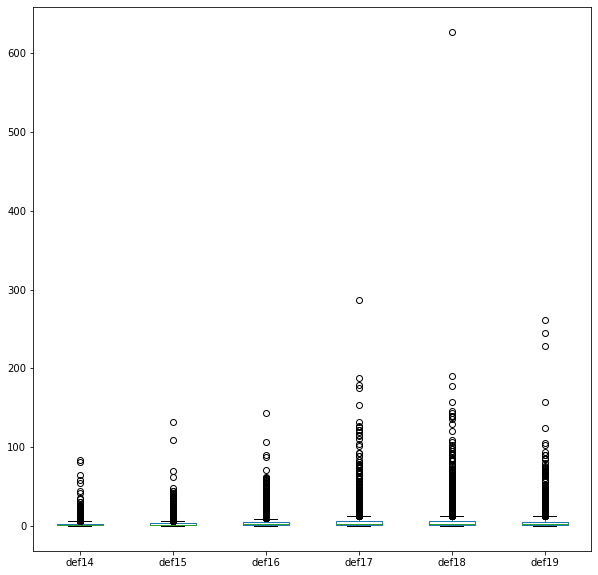

In [3]:
def14=df2[df2['año'] == 4]
def15=df2[df2['año'] == 5]
def16=df2[df2['año'] == 6]
def17=df2[df2['año'] == 7]
def18=df2[df2['año'] == 8]
def19=df2[df2['año'] == 9]

df2 = pd.DataFrame({'def14':def14['def'],'def15':def15['def'], 'def16':def16['def'], 'def17':def17['def'], 'def18':def18['def'], 'def19': def19['def']})
#print(df2)
df2.plot.box(figsize=(10,10));

### 1.2. Área deforestada anual de cada periodo 

AxesSubplot(0.125,0.125;0.775x0.755)


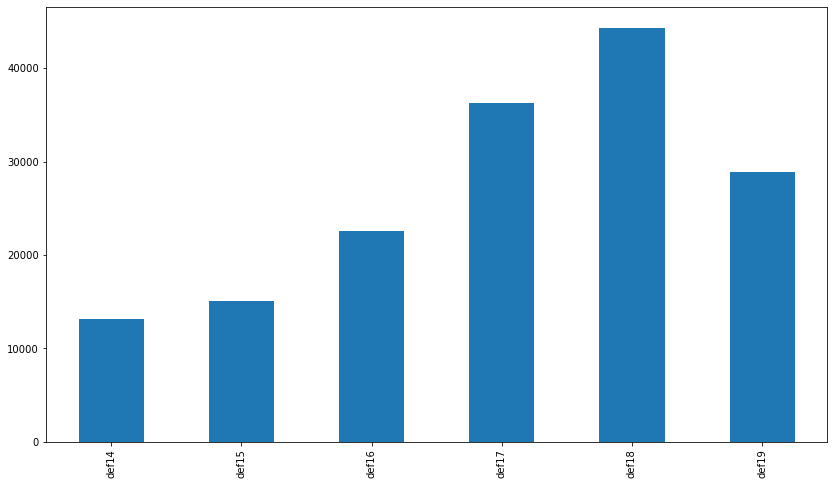

In [4]:
print (df2.sum().plot.bar(figsize=(14, 8), sharey=True))

### 1.3. Valor promedio de la deforestación de cada periodo 

AxesSubplot(0.125,0.125;0.775x0.755)


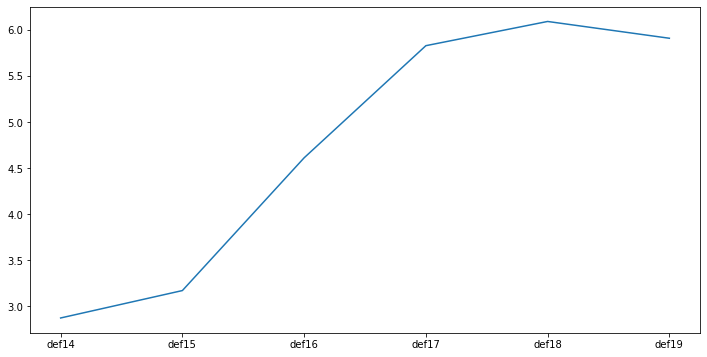

In [5]:
print (df2.mean().plot(figsize=(12, 6), sharey=True))

### 1.4. Valores máximos deforestados 

AxesSubplot(0.125,0.125;0.775x0.755)


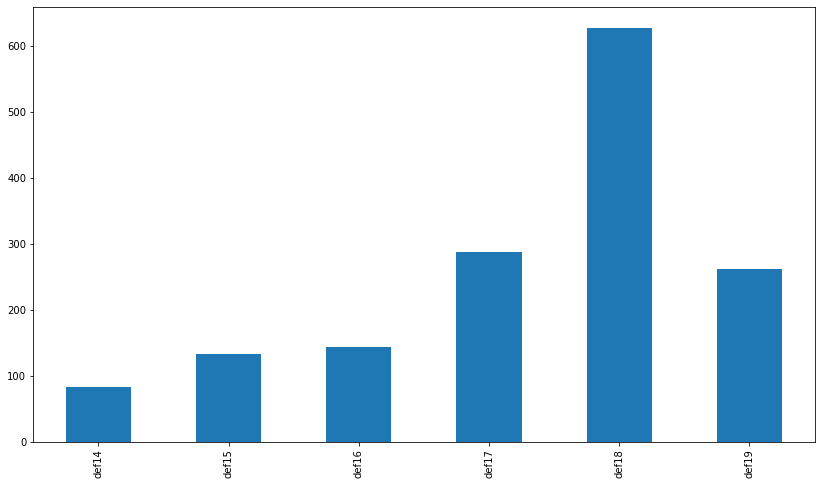

In [6]:
print (df2.max().plot.bar(figsize=(14, 8), sharey=True))

### 1.5. Frecuencia de los tamaños deforestados 

La frecuencia es el número de veces que aparecen las áreas deforestadas agrupadas en un rango determinado. Cantidad de polígonos que se encuentran en los rangos establecidos del í-esimo valor de la variable. En las siguientes gráficas se visualiza las frecuencias de cada periodo de estudio. 
&nbsp; 
Los rangos establecidos son lo siguientes: 
>+ (0 a 2)
+ [2 a 5)
+ [5 a 10)
+ [10 a 20)
+ [20 a 30)
+ [30 a 50)
+ [ >= 50]


## 2. Análisis  de los Tamaños de los parches deforestados en el Departamento Meta


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm
#import geopandas as gpd

data = 'E:/Maestria/Tesis/Estadisticas_Cambios/Deforestación_total_def_14_19_anual_ident_py.csv'
df = pd.read_csv(data, sep=";")
df2=df.drop(['wkt_geom'], axis=1)
df2.head(5)
dfmask=df2['depto'] =='META'
df_meta=df2[dfmask]

### 2.1. Box plot Meta


In [8]:
df_meta["def"].describe()

count    32591.000000
mean         4.915988
std          9.629387
min          0.092957
25%          1.394357
50%          2.416885
75%          4.926726
max        626.902705
Name: def, dtype: float64

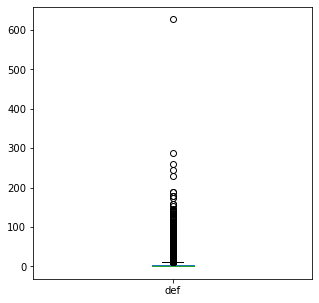

In [9]:
df_meta["def"].plot.box(figsize=(5,5));

### 2.2. Distribución de las áreas deforestadas en Meta

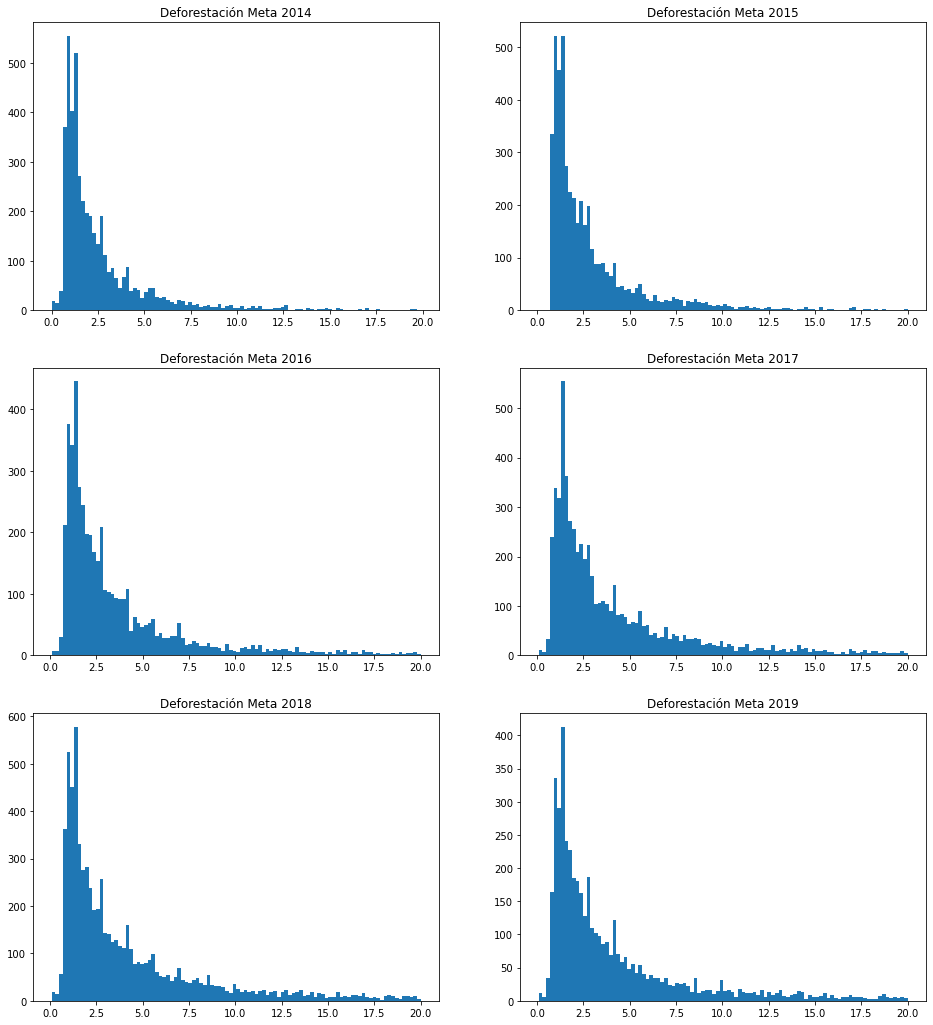

In [10]:
depto="Meta"
df=df_meta
def14=df[df['año'] == 4]
def15=df[df['año'] == 5]
def16=df[df['año'] == 6]
def17=df[df['año'] == 7]
def18=df[df['año'] == 8]
def19=df[df['año'] == 9] 

fig, ax= plt.subplots(3,2,figsize=(16,18))
bins=100
ax[0][0].hist(def14['def'],bins=bins,range=(0.1,20),align='left')
ax[0][1].hist(def15['def'],bins=bins,range=(0.1,20))
ax[1][0].hist(def16['def'],bins=bins,range=(0.1,20))
ax[1][1].hist(def17['def'],bins=bins,range=(0.1,20))
ax[2][0].hist(def18['def'],bins=bins,range=(0.1,20))
ax[2][1].hist(def19['def'],bins=bins,range=(0.1,20))
_=ax[0][0].set_title('Deforestación %s 2014'%(depto))
_=ax[0][1].set_title('Deforestación %s 2015'%(depto))
_=ax[1][0].set_title('Deforestación %s 2016'%(depto))
_=ax[1][1].set_title('Deforestación %s 2017'%(depto))
_=ax[2][0].set_title('Deforestación %s 2018'%(depto))
_=ax[2][1].set_title('Deforestación %s 2019'%(depto))


### 2.3. Frecuencia de las áreas deforestadas por intervalos en Meta

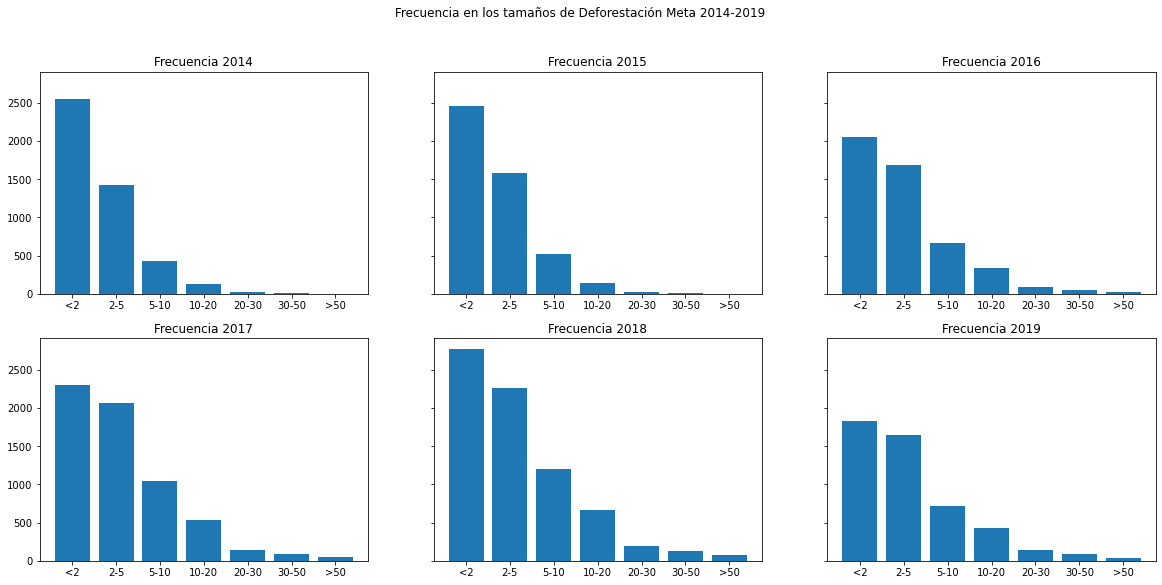

In [11]:
bins = list([0, 1.999, 5, 10, 20, 30, 50, 5000 ])
names = list(['<2', '2-5', '5-10', '10-20', '20-30', '30-50', '>50'])
df2 = pd.DataFrame({'def14':def14['def'],'def15':def15['def'], 'def16':def16['def'], 'def17':def17['def'], 'def18':def18['def'], 'def19': def19['def']})
#print(df2)
#def_14
frecuencia_14 = pd.cut(df2['def14'], bins=bins)
fr_14 = (df.groupby(frecuencia_14).agg(frequency=("def", "count")).reset_index())
fr_14["cum_frequency"] = fr_14["frequency"].cumsum()
#def_15
frecuencia_15 = pd.cut(df2["def15"], bins=bins)
fr_15 = (df.groupby(frecuencia_15).agg(frequency=("def", "count")).reset_index())
fr_15["cum_frequency"] = fr_15["frequency"].cumsum()
#def_16
frecuencia_16 = pd.cut(df2["def16"], bins=bins)
fr_16 = (df.groupby(frecuencia_16).agg(frequency=("def", "count")).reset_index())
fr_16["cum_frequency"] = fr_16["frequency"].cumsum()
#def_17
frecuencia_17 = pd.cut(df2["def17"], bins=bins)
fr_17 = (df.groupby(frecuencia_17).agg(frequency=("def", "count")).reset_index())
fr_17["cum_frequency"] = fr_17["frequency"].cumsum()
#def_18
frecuencia_18 = pd.cut(df2["def18"], bins=bins)
fr_18 = (df.groupby(frecuencia_18).agg(frequency=("def", "count")).reset_index())
fr_18["cum_frequency"] = fr_18["frequency"].cumsum()
#def_19
frecuencia_19 = pd.cut(df2["def19"], bins=bins)
fr_19 = (df.groupby(frecuencia_19).agg(frequency=("def", "count")).reset_index())
fr_19["cum_frequency"] = fr_19["frequency"].cumsum()

fig, axs = plt.subplots(2, 3, figsize=(20, 9), sharey=True)
axs[0][0].bar(names, list(fr_14["frequency"]))
axs[0][0].set_title('Frecuencia 2014')
axs[0][1].bar(names, list(fr_15["frequency"]))
axs[0][1].set_title('Frecuencia 2015')
axs[0][2].bar(names, list(fr_16["frequency"]))
axs[0][2].set_title('Frecuencia 2016')

axs[1][0].bar(names, list(fr_17["frequency"]))
axs[1][0].set_title('Frecuencia 2017')
axs[1][1].bar(names, list(fr_18["frequency"]))
axs[1][1].set_title('Frecuencia 2018')
axs[1][2].bar(names, list(fr_19["frequency"]))
axs[1][2].set_title('Frecuencia 2019')

fig.suptitle('Frecuencia en los tamaños de Deforestación Meta 2014-2019')
# adding horizontal grid lines
#for ax in axs:
    #ax.yaxis.grid(False)
    #ax.set_xlabel('Tamaño de Deforestación')
    #ax.set_ylabel('Observed values')
plt.show()

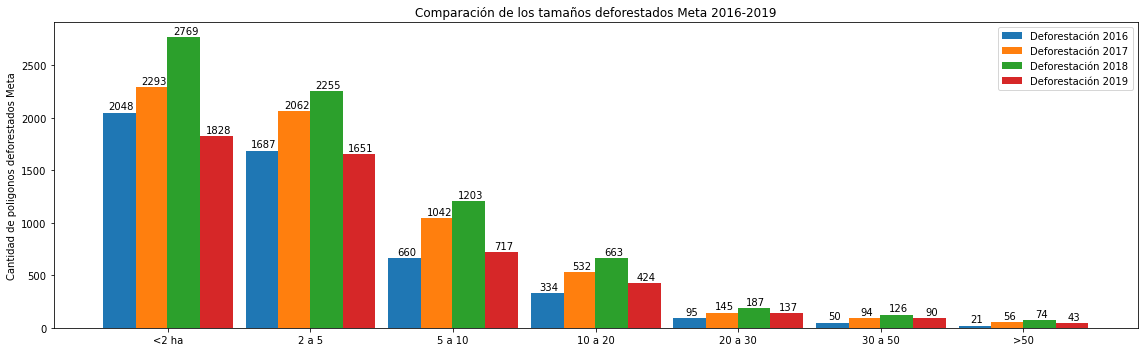

In [12]:
labels = ['<2 ha','2 a 5','5 a 10','10 a 20','20 a 30', '30 a 50','>50']
data = list(fr_16["frequency"]), list(fr_17["frequency"]), list(fr_18["frequency"]), list(fr_19["frequency"])

x = np.arange(len(labels)) 
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(16,5))
rects1 = ax.bar(x - 0.34,  list(fr_16["frequency"]), width, label='Deforestación 2016')
rects2 = ax.bar(x - 0.11,  list(fr_17["frequency"]), width, label='Deforestación 2017')
rects3 = ax.bar(x + 0.11,  list(fr_18["frequency"]), width, label='Deforestación 2018')
rects4 = ax.bar(x + 0.34,  list(fr_19["frequency"]), width, label='Deforestación 2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de poligonos deforestados Meta')
ax.set_title('Comparación de los tamaños deforestados Meta 2016-2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
fig.tight_layout()
plt.show()

### 2.4. Distribución de las áreas deforestadas en Meta de acuerdo al tamaño

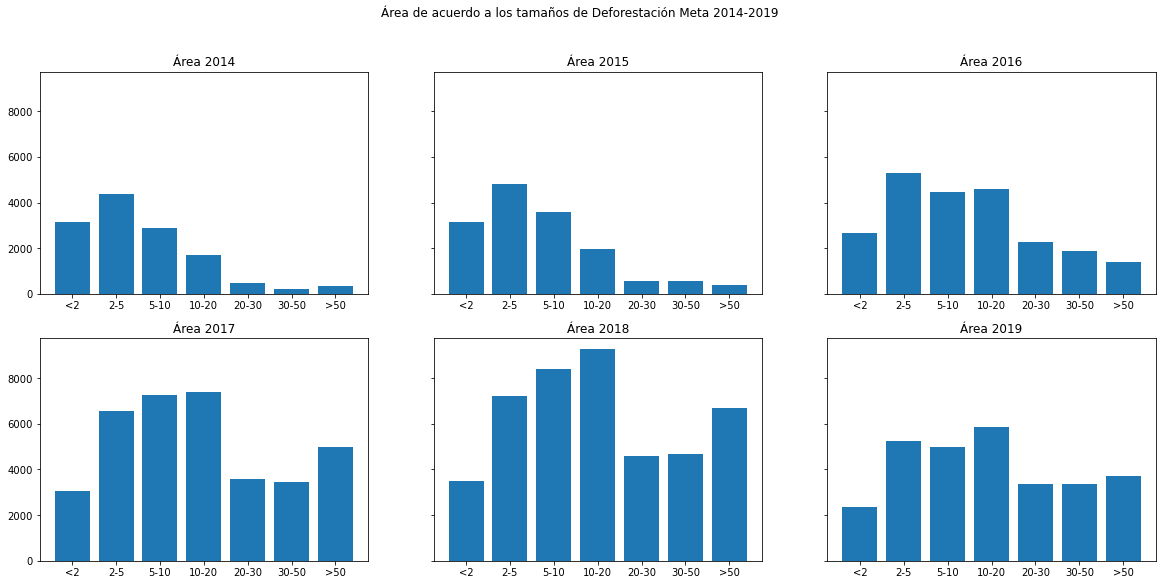

In [13]:
bins = list([0, 1.999, 5, 10, 20, 30, 50, 5000 ])
names = list(['<2', '2-5', '5-10', '10-20', '20-30', '30-50', '>50'])

#def_14
frecuencia_14 = pd.cut(df2['def14'], bins=bins)
fr_14 = (df.groupby(frecuencia_14).agg(area=("def", "sum")).reset_index())
fr_14["cum_area"] = fr_14["area"].cumsum()
#def_15
frecuencia_15 = pd.cut(df2["def15"], bins=bins)
fr_15 = (df.groupby(frecuencia_15).agg(area=("def", "sum")).reset_index())
fr_15["cum_areay"] = fr_15["area"].cumsum()
#def_16
frecuencia_16 = pd.cut(df2["def16"], bins=bins)
fr_16 = (df.groupby(frecuencia_16).agg(area=("def", "sum")).reset_index())
fr_16["cum_area"] = fr_16["area"].cumsum()
#def_17
frecuencia_17 = pd.cut(df2["def17"], bins=bins)
fr_17 = (df.groupby(frecuencia_17).agg(area=("def", "sum")).reset_index())
fr_17["cum_area"] = fr_17["area"].cumsum()
#def_18
frecuencia_18 = pd.cut(df2["def18"], bins=bins)
fr_18 = (df.groupby(frecuencia_18).agg(area=("def", "sum")).reset_index())
fr_18["cum_area"] = fr_18["area"].cumsum()
#def_19
frecuencia_19 = pd.cut(df2["def19"], bins=bins)
fr_19 = (df.groupby(frecuencia_19).agg(area=("def", "sum")).reset_index())
fr_19["cum_area"] = fr_19["area"].cumsum()

fig, axs = plt.subplots(2, 3, figsize=(20, 9), sharey=True)
axs[0][0].bar(names, list(fr_14["area"]))
axs[0][0].set_title('Área 2014')
axs[0][1].bar(names, list(fr_15["area"]))
axs[0][1].set_title('Área 2015')
axs[0][2].bar(names, list(fr_16["area"]))
axs[0][2].set_title('Área 2016')


axs[1][0].bar(names, list(fr_17["area"]))
axs[1][0].set_title('Área 2017')
axs[1][1].bar(names, list(fr_18["area"]))
axs[1][1].set_title('Área 2018')
axs[1][2].bar(names, list(fr_19["area"]))
axs[1][2].set_title('Área 2019')

fig.suptitle('Área de acuerdo a los tamaños de Deforestación Meta 2014-2019')
# adding horizontal grid lines
#for ax in axs:
    #ax.yaxis.grid(False)
    #ax.set_xlabel('Tamaño de Deforestación')
    #ax.set_ylabel('Observed values')
plt.show()

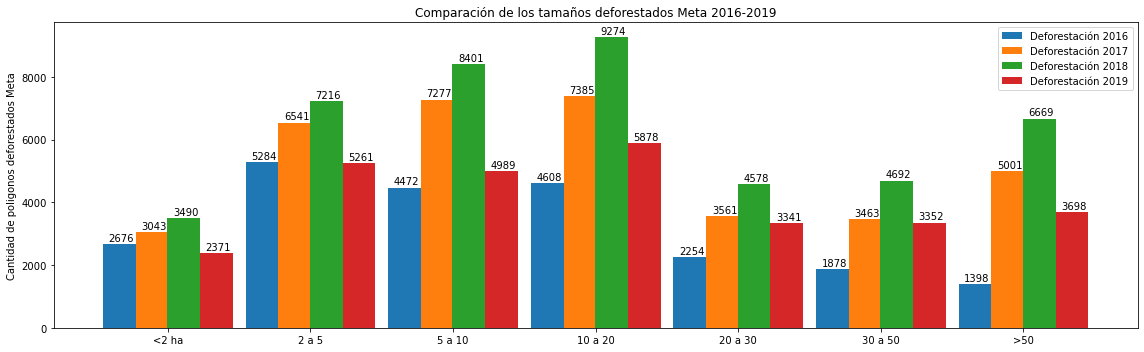

In [14]:
labels = ['<2 ha','2 a 5','5 a 10','10 a 20','20 a 30', '30 a 50','>50']
data = list(fr_16["area"]), list(fr_17["area"]), list(fr_18["area"]), list(fr_19["area"])

x = np.arange(len(labels)) 
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(16,5))
rects1 = ax.bar(x - 0.34,  list(fr_16["area"].astype(int)), width, label='Deforestación 2016')
rects2 = ax.bar(x - 0.11,  list(fr_17["area"].astype(int)), width, label='Deforestación 2017')
rects3 = ax.bar(x + 0.11,  list(fr_18["area"].astype(int)), width, label='Deforestación 2018')
rects4 = ax.bar(x + 0.34,  list(fr_19["area"].astype(int)), width, label='Deforestación 2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de poligonos deforestados Meta')
ax.set_title('Comparación de los tamaños deforestados Meta 2016-2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
fig.tight_layout()
plt.show()

### 2.5. Distribución porcentual del tamaño de la deforestación en Meta  

 ### 2.5.1 De acuerdo a la cantidad de poligonos

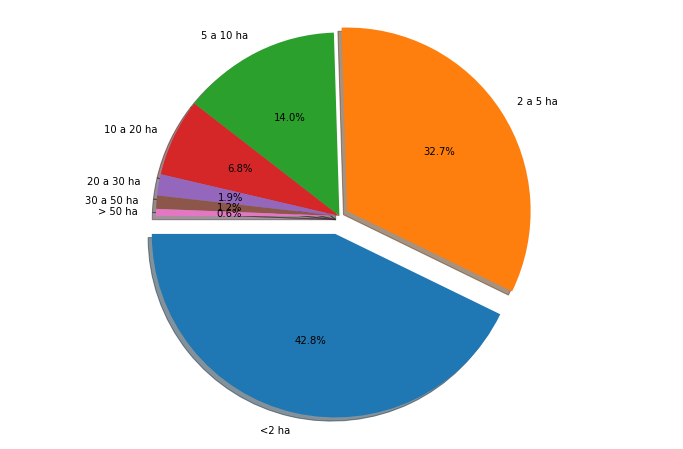

In [15]:
frecuencia_meta= pd.cut(df_meta["def"], bins=bins)
fr_19 = (df_meta.groupby(frecuencia_meta).agg(frequency=("def", "count")).reset_index())
fr_19["cum_frequency"] = fr_19["frequency"].cumsum()

porcentaje_19=100*fr_19['frequency']/fr_19['frequency'].sum()

labels = ['<2 ha','2 a 5 ha','5 a 10 ha','10 a 20 ha','20 a 30 ha', '30 a 50 ha','> 50 ha']
explode = (0.1 , 0.05, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(porcentaje_19, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, radius=1)
ax1.axis('equal') 
plt.show()

### 2.5.2 De acuerdo al área de la deforestación

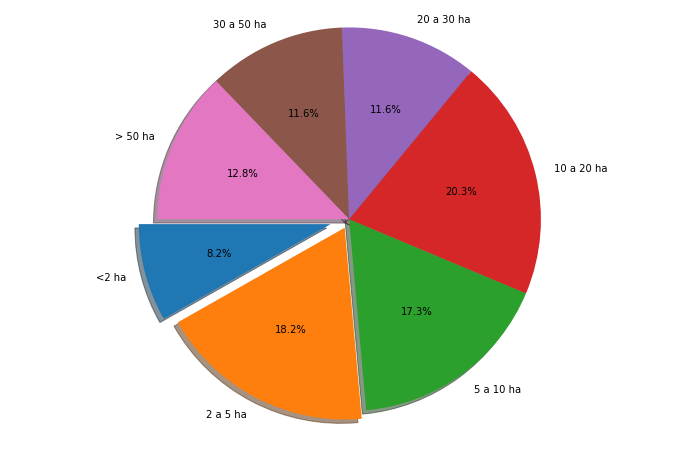

In [16]:
frecuencia_19 = pd.cut(df2["def19"], bins=bins)
fr_19 = (df.groupby(frecuencia_19).agg(area=("def", "sum")).reset_index())
fr_19["cum_area"] = fr_19["area"].cumsum()

porcentaje_19=100*fr_19['area']/fr_19['area'].sum()

labels = ['<2 ha','2 a 5 ha','5 a 10 ha','10 a 20 ha','20 a 30 ha', '30 a 50 ha','> 50 ha']
explode = (0.1 , 0.05, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(porcentaje_19, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, radius=1)
ax1.axis('equal') 
plt.show()